In [40]:
import numpy as np
import pylab as pl

from sklearn.datasets import load_iris
from sklearn import tree

from scipy import stats
import graphviz 

In [41]:
iris = load_iris()

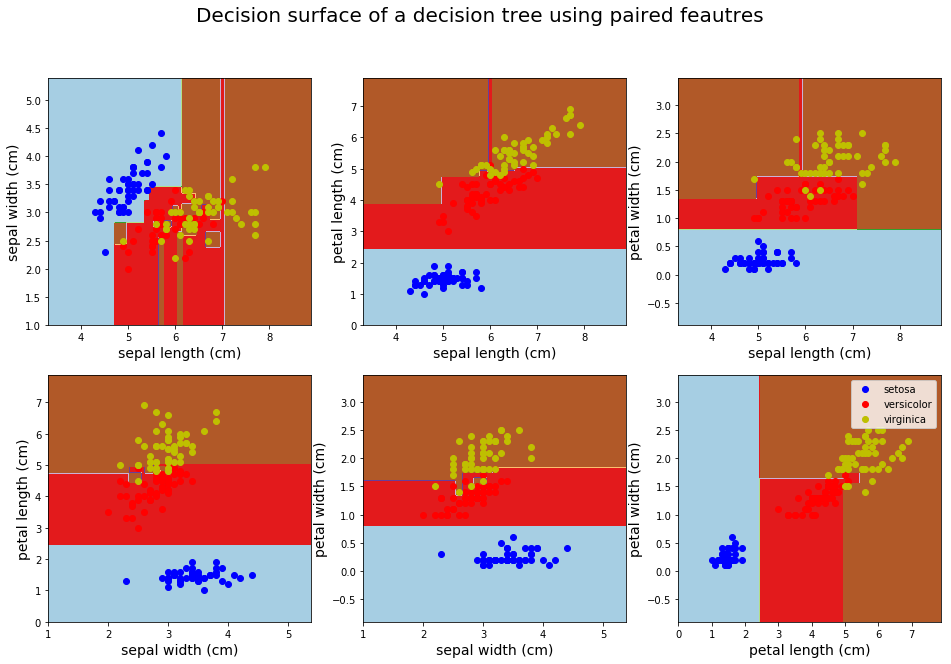

In [42]:
n_classes = 3
plot_colors ='bry'
plot_step = 0.02

figure = pl.figure(figsize=(16,10))

for pairidx, pair in enumerate([[0,1], [0,2],[0,3],[1,2],[1,3],[2,3]]):
    X = iris.data[:,pair]
    y = iris.target
    
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    
    #Standardize
    stats.zscore(X)
    
    clr = tree.DecisionTreeClassifier().fit(X,y)
    
    #Plot decision boundery
    pl.subplot(2, 3, pairidx +1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min,x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    Z = clr.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = pl.contourf(xx, yy, Z, cmap = pl.cm.Paired)
    
    pl.xlabel(iris.feature_names[pair[0]],fontsize=14)
    pl.ylabel(iris.feature_names[pair[1]],fontsize=14)
    pl.axis('tight')
    
    #Plot training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        pl.scatter(X[idx,0],X[idx,1], c=color, label = iris.target_names[i], cmap=pl.cm.Paired)
        pl.axis('tight')
        
    dot_data = tree.export_graphviz(clr, out_file=None, feature_names=[iris.feature_names[i] for i in pair], class_names=iris.target_names, filled=True,rounded=True,special_characters=True)
    graph = graphviz.Source(dot_data)
    graph
    
pl.suptitle('Decision surface of a decision tree using paired feautres', fontsize=20)
pl.legend()
pl.show()

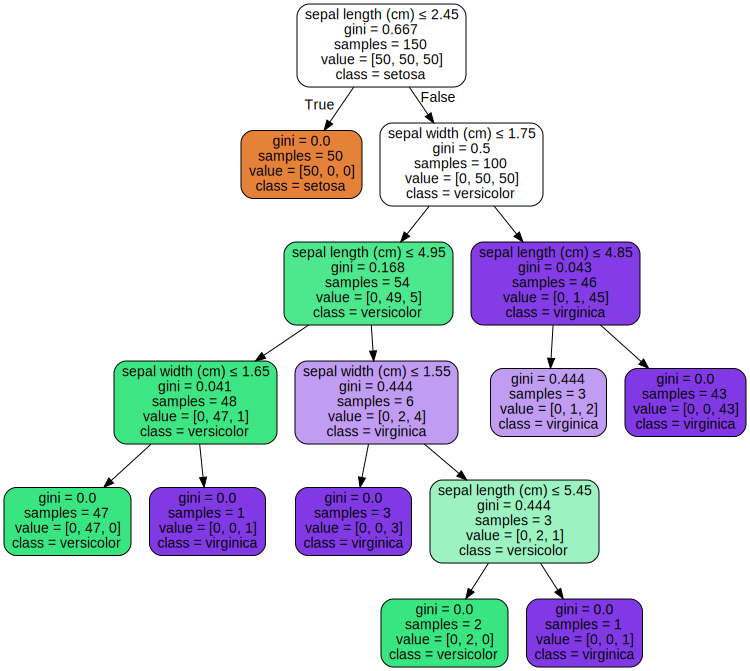

In [43]:
dot_data = tree.export_graphviz(clr, out_file=None, feature_names=[iris.feature_names[i] for i in [0,1]], class_names=iris.target_names, filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph